In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 40
import numpy as np
import os,random, math
from tqdm import tqdm
from copy import deepcopy
from collections import Counter

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'NanumGothic'
import platform
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

# from dataprep.eda import plot, plot_correlation, plot_missing

import plotly 
import plotly.express as px
# from plotly import tools, subplots
# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# from plotly.offline import init_notebook_mode, iplot
# import plotly.graph_objs as go
# import plotly.express as px

# Warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


In [378]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)
from sklearn.metrics import mean_absolute_error

In [382]:
test = pd.read_csv("/Users/seungji/Desktop/Dacon/Daesamanlap/ProcessedData/merged_test.csv")
train = pd.read_csv("/Users/seungji/Desktop/Dacon/Daesamanlap/ProcessedData/merged_train.csv")

In [2]:
tr_gr = train.groupby("단지코드").mean().reset_index()
tst_gr = test.groupby("단지코드").mean().reset_index()
지역 = []
for d in train.단지코드.unique():
    지역.append(train.loc[train.단지코드 == d,"지역"].unique()[0])
tr_gr["지역"] = 지역
# train["지역구분"] = [0]*len(train)
# tr_gr.loc[tr_gr.지역.isin(['경상남도', '경기도', '전라북도', '강원도',  '충청남도','제주특별자치도',  '충청북도', '전라남도', '경상북도', '세종특별자치시']),"지역"] = "8도"
# tr_gr.loc[tr_gr.지역.isin(['대전광역시', '광주광역시', '울산광역시', '대구광역시', '서울특별시','부산광역시']),"지역"] = "광역시"

자격유형 = []
for d in train.단지코드.unique():
    자격유형.append(train.loc[train.단지코드 == d,"자격유형"].unique()[0])
tr_gr["자격유형"] = 자격유형

공급유형 = []
for d in train.단지코드.unique():
    공급유형.append(train.loc[train.단지코드 == d,"공급유형"].unique()[0])
tr_gr["공급유형"] = 공급유형

지역 = []
for d in test.단지코드.unique():
    지역.append(test.loc[test.단지코드 == d,"지역"].unique()[0])
tst_gr["지역"] = 지역
# train["지역구분"] = [0]*len(train)
# tr_gr.loc[tr_gr.지역.isin(['경상남도', '경기도', '전라북도', '강원도',  '충청남도','제주특별자치도',  '충청북도', '전라남도', '경상북도', '세종특별자치시']),"지역"] = "8도"
# tr_gr.loc[tr_gr.지역.isin(['대전광역시', '광주광역시', '울산광역시', '대구광역시', '서울특별시','부산광역시']),"지역"] = "광역시"

자격유형 = []
for d in test.단지코드.unique():
    자격유형.append(test.loc[test.단지코드 == d,"자격유형"].unique()[0])
tst_gr["자격유형"] = 자격유형

공급유형 = []
for d in test.단지코드.unique():
    공급유형.append(test.loc[test.단지코드 == d,"공급유형"].unique()[0])
tst_gr["공급유형"] = 공급유형

tr_gr["전용면적_std"] = train.groupby("단지코드").std().reset_index()["전용면적"]
tr_gr["전용면적별세대수_std"] = train.groupby("단지코드").std().reset_index()["전용면적별세대수"]
tr_gr["임대보증금_std"] = train.groupby("단지코드").std().reset_index()["임대보증금"]
tr_gr["임대료_std"] = train.groupby("단지코드").std().reset_index()["임대료"]
tst_gr["전용면적_std"] = test.groupby("단지코드").std().reset_index()["전용면적"]
tst_gr["전용면적별세대수_std"] = test.groupby("단지코드").std().reset_index()["전용면적별세대수"]
tst_gr["임대보증금_std"] = test.groupby("단지코드").std().reset_index()["임대보증금"]
tst_gr["임대료_std"] = test.groupby("단지코드").std().reset_index()["임대료"]
tr_re = pd.concat([train.단지코드,pd.get_dummies(train["지역"])],axis=1).groupby("단지코드").sum()
tst_re = pd.concat([test.단지코드,pd.get_dummies(test["지역"])],axis=1).groupby("단지코드").sum()
tr_re[tr_re>0] = 1
tst_re[tst_re>0] = 1
tr_gr = tr_gr.merge(tr_re, left_on = "단지코드",right_on ="단지코드",how = "left")
tst_gr =tst_gr.merge(tst_re, left_on = "단지코드",right_on ="단지코드",how = "left")
tr_apart = pd.concat([train.단지코드,pd.get_dummies(train["임대건물구분"])],axis=1).groupby("단지코드").sum().reset_index()
tst_apart = pd.concat([test.단지코드,pd.get_dummies(test["임대건물구분"])],axis=1).groupby("단지코드").sum().reset_index()
tr_gr = tr_gr.merge(tr_apart, left_on = "단지코드",right_on ="단지코드",how = "left")
tst_gr =tst_gr.merge(tst_apart, left_on = "단지코드",right_on ="단지코드",how = "left")
tr_gong = pd.concat([train.단지코드, pd.get_dummies(train["공급유형"])],axis =1)
tst_gong = pd.concat([test.단지코드, pd.get_dummies(test["공급유형"])],axis =1)
tr_gong["공공임대(5년,10년)"] = tr_gong["공공임대(5년)"]+tr_gong["공공임대(10년)"]
tst_gong["공공임대(5년,10년)"] = tr_gong["공공임대(10년)"]
tr_gong = tr_gong[['단지코드',   '공공임대(50년)',  '공공임대(분납)',
       '국민임대', '영구임대', '임대상가',  '행복주택', '공공임대(5년,10년)']]
tst_gong = tst_gong[['단지코드',   '공공임대(50년)',  '공공임대(분납)',
       '국민임대', '영구임대', '임대상가',  '행복주택', '공공임대(5년,10년)']]
tr_gong = tr_gong.groupby("단지코드").sum()
tst_gong = tst_gong.groupby("단지코드").sum()
tr_gong[tr_gong>0] = 1
tst_gong[tst_gong>0] = 1
tr_gong = tr_gong.reset_index()
tst_gong = tst_gong.reset_index()

tr_gr = tr_gr.merge(tr_gong, left_on = "단지코드",right_on ="단지코드",how = "left")
tst_gr =tst_gr.merge(tst_gong, left_on = "단지코드",right_on ="단지코드",how = "left")

tr_ja = pd.concat([train.단지코드,pd.get_dummies(train["자격유형"])],axis=1).groupby("단지코드").sum()
tst_ja = pd.concat([test.단지코드,pd.get_dummies(test["자격유형"])],axis=1).groupby("단지코드").sum()

tr_ja[tr_ja>0] = 1
tst_ja[tst_ja>0] = 1

tr_ja = tr_ja[tst_ja.columns]
tr_ja = tr_ja.reset_index()
tst_ja = tst_ja.reset_index()

tr_gr = tr_gr.merge(tr_ja, left_on = "단지코드",right_on ="단지코드",how = "left")
tst_gr =tst_gr.merge(tst_ja, left_on = "단지코드",right_on ="단지코드",how = "left")
tr_gr =tr_gr.drop("서울특별시",axis=1)

tr_gr.loc[tr_gr.전용면적_std.isna(),"전용면적_std"] = 0
tr_gr.loc[tr_gr.전용면적별세대수_std.isna(),"전용면적별세대수_std"] = 0
tr_gr.loc[tr_gr.임대보증금_std.isna(),"임대보증금_std"] = 0
tr_gr.loc[tr_gr.임대료_std.isna(),"임대료_std"] = 0

NameError: name 'train' is not defined

In [384]:
train = tr_gr
test = tst_gr

In [385]:
train

단지코드       총세대수    전용면적  전용면적별세대수     공가수            임대보증금  \
0    C1000   566.0000 45.2186   80.8571 10.0000  13,203,571.4286   
1    C1004   521.0000 39.1368   27.4211  3.0000   9,645,112.2951   
2    C1005 1,144.0000 54.3600  381.3333 16.0000  17,107,666.6667   
3    C1013 1,308.0000 46.1420  261.6000 16.0000  24,924,800.0000   
4    C1014   996.0000 49.2329  142.2857  5.0000  23,894,000.0000   
5    C1015   961.0000 46.0475  120.1250 28.0000  15,871,250.0000   
6    C1017 1,460.0000 36.8367  486.6667 27.0000  19,917,000.0000   
7    C1022   389.0000 46.9000   97.2500  4.0000  24,665,000.0000   
8    C1024   680.0000 78.4230   47.7000  2.0000 103,772,700.0000   
9    C1026   290.0000 55.8250  145.0000 10.0000  24,147,500.0000   
10   C1027   452.0000 42.7200   90.4000 21.0000  22,218,800.0000   
11   C1032   946.0000 51.6433  157.6667  6.0000  27,777,166.6667   
12   C1036   742.0000 46.8729  106.0000 13.0000  34,634,571.4286   
13   C1039   790.0000 41.9636   71.8182 13.0000  73,676,272.7273   
14   C1045   464.0000 34.1025  116.0000 13.0000  15,525,000.0000   
15   C1046   232.0000 41.7233   77.3333  9.0000  18,580,333.3333   
16   C1048   368.0000 37.2733  122.6667 15.0000  31,552,333.3333   
17   C1049   676.0000 45.5380  135.2000 18.0000  24,993,200.0000   
18   C1056   410.0000 31.2683   34.1667  0.0000     622,208.3333   
19   C1057   521.0000 47.6450  130.2500 24.0000  19,598,750.0000   
20   C1059   514.0000 43.1383   85.6667  7.0000  16,954,000.0000   
21   C1065   938.0000 35.9200  312.6667 37.0000  13,507,333.3333   
22   C1068   806.0000 43.4917  134.1667 11.0000  16,540,666.6667   
23   C1077   861.0000 45.1600  287.0000 21.0000  18,725,333.3333   
24   C1084   280.0000 48.8067   46.6667  2.0000  17,393,333.3333   
25   C1085   525.0000 41.4250  131.2500  4.0000  15,776,000.0000   
26   C1089   368.0000 45.0367   61.3333 14.0000  13,426,000.0000   
27   C1102   522.0000 45.1633   87.0000 21.0000  17,754,666.6667   
28   C1103   935.0000 41.2150  233.7500 31.0000  15,591,000.0000   
29   C1109 1,957.0000 45.4095   88.9545  1.0000  12,750,732.3823   
30   C1122   808.0000 43.7871  115.4286  7.0000  21,417,857.1429   
31   C1129 1,444.0000 57.8113  180.5000  2.0000  51,269,250.0000   
32   C1131   901.0000 55.6800  225.2500 10.0000  20,601,750.0000   
33   C1133   856.0000 42.0583  142.6667 10.0000  22,916,500.0000   
34   C1136   984.0000 40.4425  246.0000 31.0000  73,838,750.0000   
35   C1141   630.0000 46.9117  105.0000 28.0000  15,384,833.3333   
36   C1143   693.0000 39.6267  231.0000  3.0000  16,944,333.3333   
37   C1155   375.0000 54.3033  125.0000  9.0000  36,751,000.0000   
38   C1156 1,004.0000 26.5587  124.7500 47.0000  67,596,375.0000   
39   C1163   316.0000 37.7900  105.3333 20.0000  12,762,333.3333   
40   C1171   624.0000 44.7083   52.0000 13.0000  32,014,083.3333   
41   C1173   571.0000 45.8278   63.4444  7.0000  19,141,888.8889   
42   C1175   468.0000 52.9033  156.0000 15.0000  27,325,666.6667   
43   C1176 1,486.0000 37.2600  185.7500 55.0000  18,480,750.0000   
44   C1177 1,668.0000 42.2775  104.2500 17.0000  29,420,687.5000   
45   C1180   314.0000 54.5800  104.6667 15.0000  17,588,333.3333   
46   C1184   458.0000 45.5343   65.4286  4.0000  33,181,428.5714   
47   C1194   511.0000 53.3800  102.2000  3.0000  19,473,800.0000   
48   C1206   755.0000 42.7983   40.6667  1.0000  13,015,643.8114   
49   C1207   100.0000 27.8467   33.3333 10.0000  28,073,333.3333   
50   C1210 1,088.0000 25.6080  217.6000 39.0000  23,832,000.0000   
51   C1213   312.0000 41.4767   52.0000  8.0000  15,847,500.0000   
52   C1227   806.0000 41.9611   89.5556  7.0000  24,699,000.0000   
53   C1234   307.0000 55.7150  153.5000  1.0000  23,830,000.0000   
54   C1236 1,124.0000 46.0258   93.6667 29.0000  21,429,000.0000   
55   C1244 1,722.0000 45.7808  132.4615 10.0000  40,900,461.5385   
56   C1258   840.0000 31.3133  140.0000  0.0000  13,828,000.0000   
57   C1263   268.0000 35.7720   53.6000  4.0000   8,408,400.00

In [361]:
train.columns

Index(['단지코드', '총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '지하철역',
       '버스정류장', '단지내주차면수', '등록차량수', '연면적', '위도', '경도', 'subway_dist', '환승역 수',
       '총인구수', '세대당_인구', '남/여비율', '남/여_0~19세', '남/여_20~39세', '남/여_40~69세',
       '남/여_70세이상', '0~19세_비율', '20~39세_비율', '40~69세_비율', '70세이상_비율', '지역',
       '자격유형', '공급유형', '전용면적_std', '전용면적별세대수_std', '임대보증금_std', '임대료_std',
       '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도', '상가',
       '아파트', '공공임대(50년)', '공공임대(분납)', '국민임대', '영구임대', '임대상가', '행복주택',
       '공공임대(5년,10년)', 'A', 'C', 'D', 'E', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N'],
      dtype='object')

In [362]:
train["등록차량수/총세대수"] = train["등록차량수"]/train["총세대수"]
train["등록차량수/연면적"] = train["등록차량수"]/train["연면적"]
train["임대보증금/임대료"] = train["임대보증금"]/train["임대료"]

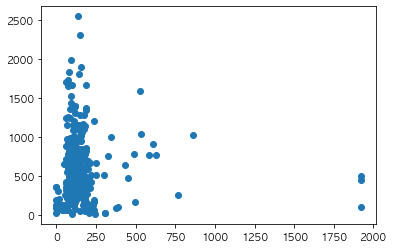

In [373]:
plt.scatter(train["임대보증금/임대료"],train["등록차량수"])
plt.show()

In [366]:
train["등록차량수"].describe()

count     414.0000
mean      568.8374
std       390.3442
min        13.0000
25%       289.2500
50%       505.0000
75%       756.2500
max     2,550.0000
Name: 등록차량수, dtype: float64

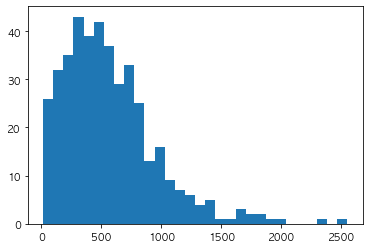

In [369]:
plt.hist(train["등록차량수"],bins = 30)
plt.show()

In [301]:
train2 = train.drop(["단지코드","지역","위도","경도","자격유형","공급유형","등록차량수","등록차량수/총세대수","등록차량수/연면적","임대보증금/임대료"],axis=1)
test2 = test.drop(["단지코드","지역","위도","경도","자격유형","공급유형"],axis=1)

In [338]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc = sc.fit(train2)
x = sc.transform(train2)
x_tst = sc.transform(test2)

In [339]:
from sklearn.cluster import KMeans

In [340]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(x)
kmeans.predict(x_tst)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [344]:
pd.DataFrame(kmeans.labels_).value_counts()/len(kmeans.labels_)

1   0.9203
0   0.0797
dtype: float64

In [346]:
kmeans.score()

TypeError: score() missing 1 required positional argument: 'X'

In [306]:
train["km1"] = kmeans.labels_

In [307]:
train["등록차량수/총세대수"] = train["등록차량수"]/train["총세대수"]

In [308]:
len(train.columns)

74

In [309]:
train.columns

Index(['단지코드', '총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '지하철역',
       '버스정류장', '단지내주차면수', '등록차량수', '연면적', '위도', '경도', 'subway_dist', '환승역 수',
       '총인구수', '세대당_인구', '남/여비율', '남/여_0~19세', '남/여_20~39세', '남/여_40~69세',
       '남/여_70세이상', '0~19세_비율', '20~39세_비율', '40~69세_비율', '70세이상_비율', '지역',
       '자격유형', '공급유형', '전용면적_std', '전용면적별세대수_std', '임대보증금_std', '임대료_std',
       '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도', '상가',
       '아파트', '공공임대(50년)', '공공임대(분납)', '국민임대', '영구임대', '임대상가', '행복주택',
       '공공임대(5년,10년)', 'A', 'C', 'D', 'E', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', '등록차량수/총세대수', '등록차량수/연면적', '임대보증금/임대료', 'km1'],
      dtype='object')

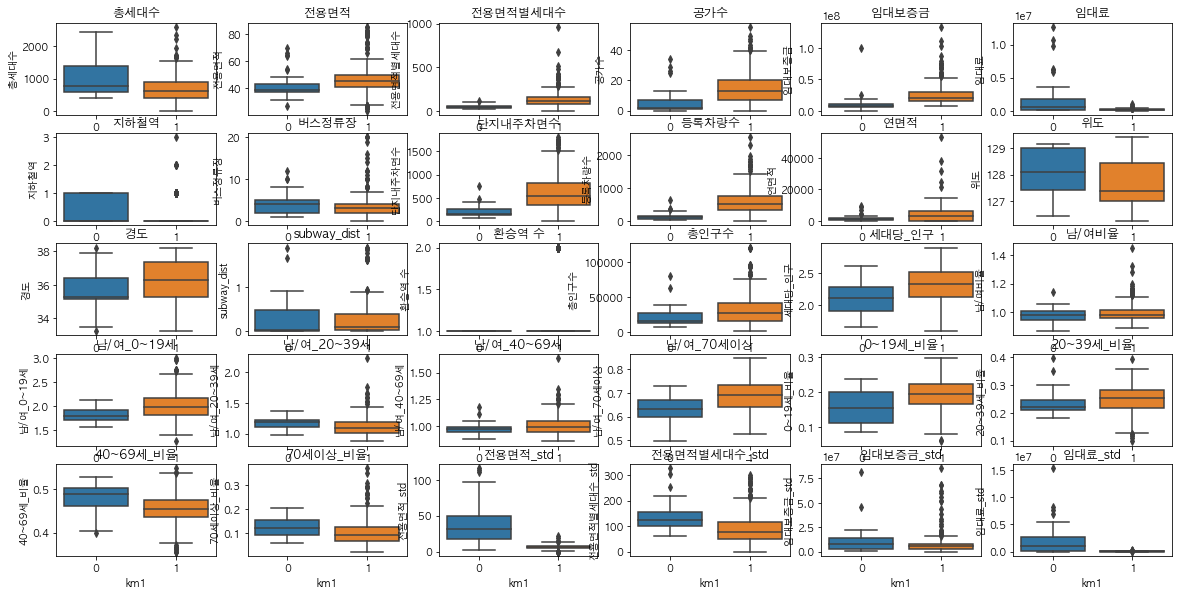

In [310]:
train["km1"] = kmeans.labels_
plt.figure(figsize=(20,24))
for i,r in enumerate(['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '지하철역',
       '버스정류장', '단지내주차면수', '등록차량수', '연면적', '위도', '경도', 'subway_dist', '환승역 수',
       '총인구수', '세대당_인구', '남/여비율', '남/여_0~19세', '남/여_20~39세', '남/여_40~69세',
       '남/여_70세이상', '0~19세_비율', '20~39세_비율', '40~69세_비율', '70세이상_비율', 
       '전용면적_std', '전용면적별세대수_std', '임대보증금_std', '임대료_std']):
    plt.subplot(12,6,i+1)
    sns.boxplot(train.km1, train[r])
    plt.title(r)

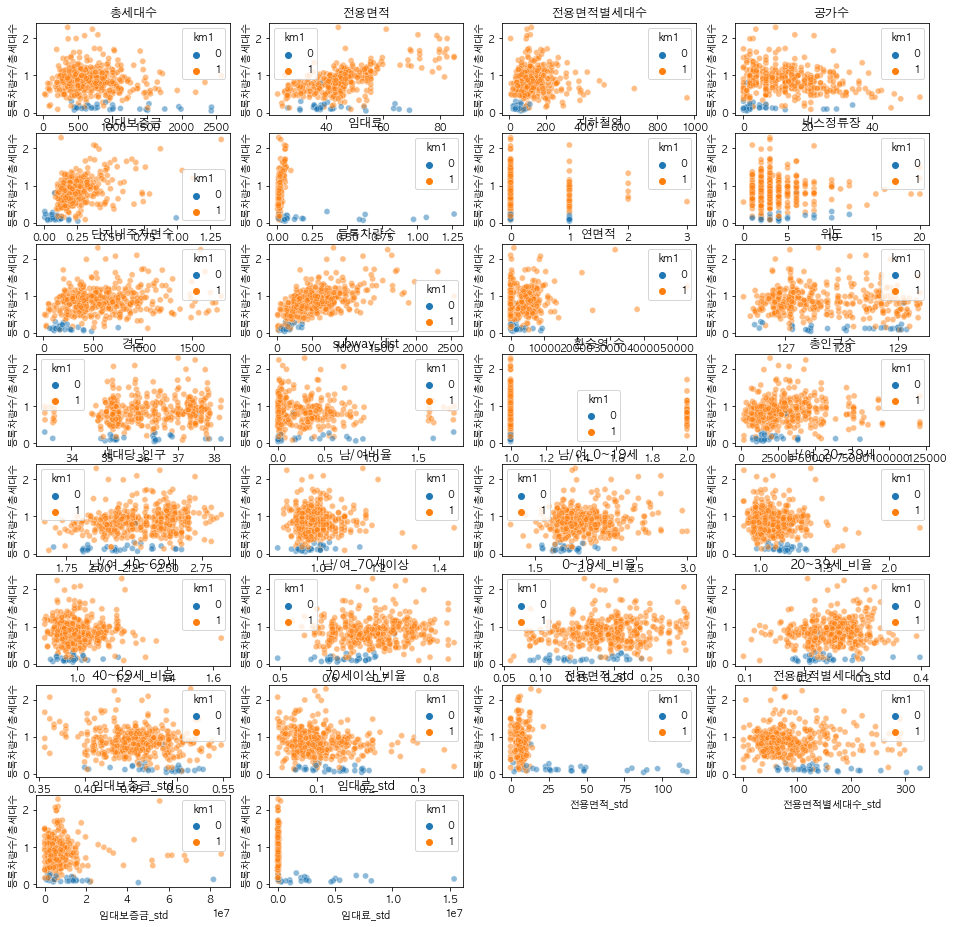

In [311]:
train["km1"] = kmeans.labels_
plt.figure(figsize=(16,24))
for i,r in enumerate(['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '지하철역',
       '버스정류장', '단지내주차면수', '등록차량수', '연면적', '위도', '경도', 'subway_dist', '환승역 수',
       '총인구수', '세대당_인구', '남/여비율', '남/여_0~19세', '남/여_20~39세', '남/여_40~69세',
       '남/여_70세이상', '0~19세_비율', '20~39세_비율', '40~69세_비율', '70세이상_비율', 
       '전용면적_std', '전용면적별세대수_std', '임대보증금_std', '임대료_std']):
    plt.subplot(12,4,i+1)
    sns.scatterplot(x = r,y = "등록차량수/총세대수", hue = "km1",data = train,alpha = 0.5)
    plt.title(r)

In [312]:
지역order =  ['경상남도', '경기도', '전라북도', '강원도',  '충청남도','제주특별자치도',  '충청북도', '전라남도', '경상북도', '세종특별자치시','대전광역시', '광주광역시', '울산광역시', '대구광역시', '서울특별시','부산광역시']

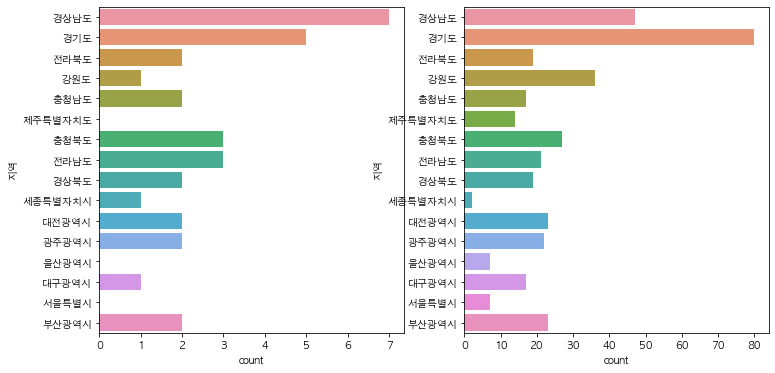

In [313]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(y = train.loc[kmeans.labels_== 0,"지역"],order = 지역order)
plt.subplot(1,2,2)
sns.countplot(y = train.loc[kmeans.labels_== 1,"지역"],order = 지역order)
plt.show()

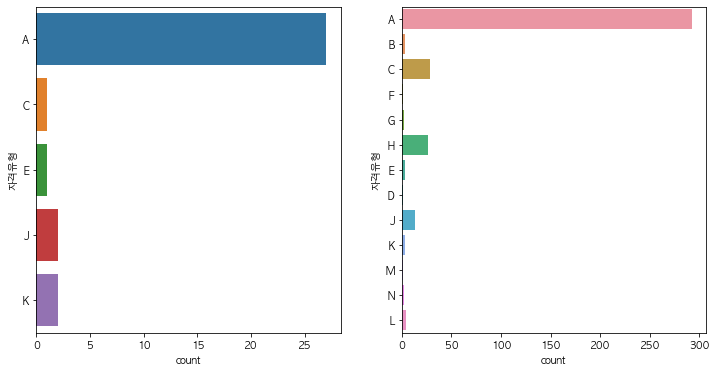

In [314]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(y = train.loc[kmeans.labels_== 0,"자격유형"])
plt.subplot(1,2,2)
sns.countplot(y = train.loc[kmeans.labels_== 1,"자격유형"])
plt.show()

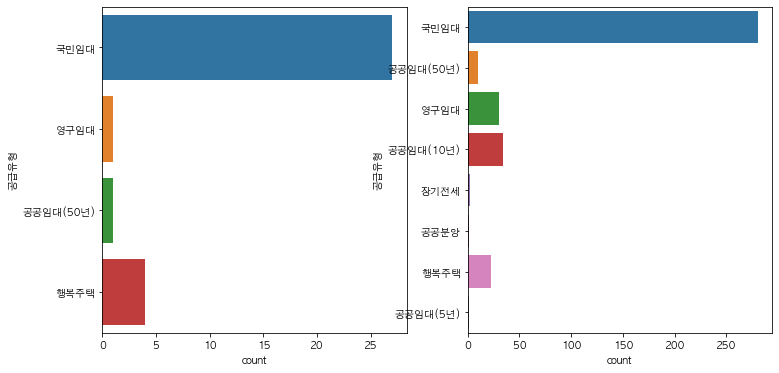

In [315]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(y = train.loc[kmeans.labels_== 0,"공급유형"])
plt.subplot(1,2,2)
sns.countplot(y = train.loc[kmeans.labels_== 1,"공급유형"])
plt.show()

In [347]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(x)
kmeans.predict(x_tst)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [348]:
pd.DataFrame(kmeans.labels_).value_counts()/len(kmeans.labels_)

1   0.5000
0   0.4203
2   0.0797
dtype: float64

In [351]:
train_km1 = train[kmeans.labels_ ==1]

In [352]:
train_km1.to_csv("train_km1.csv",index=False)

In [317]:
train["km2"] = kmeans.labels_

In [318]:
len(train.columns)

75

In [319]:
train.columns

Index(['단지코드', '총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '지하철역',
       '버스정류장', '단지내주차면수', '등록차량수', '연면적', '위도', '경도', 'subway_dist', '환승역 수',
       '총인구수', '세대당_인구', '남/여비율', '남/여_0~19세', '남/여_20~39세', '남/여_40~69세',
       '남/여_70세이상', '0~19세_비율', '20~39세_비율', '40~69세_비율', '70세이상_비율', '지역',
       '자격유형', '공급유형', '전용면적_std', '전용면적별세대수_std', '임대보증금_std', '임대료_std',
       '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도', '상가',
       '아파트', '공공임대(50년)', '공공임대(분납)', '국민임대', '영구임대', '임대상가', '행복주택',
       '공공임대(5년,10년)', 'A', 'C', 'D', 'E', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', '등록차량수/총세대수', '등록차량수/연면적', '임대보증금/임대료', 'km1', 'km2'],
      dtype='object')

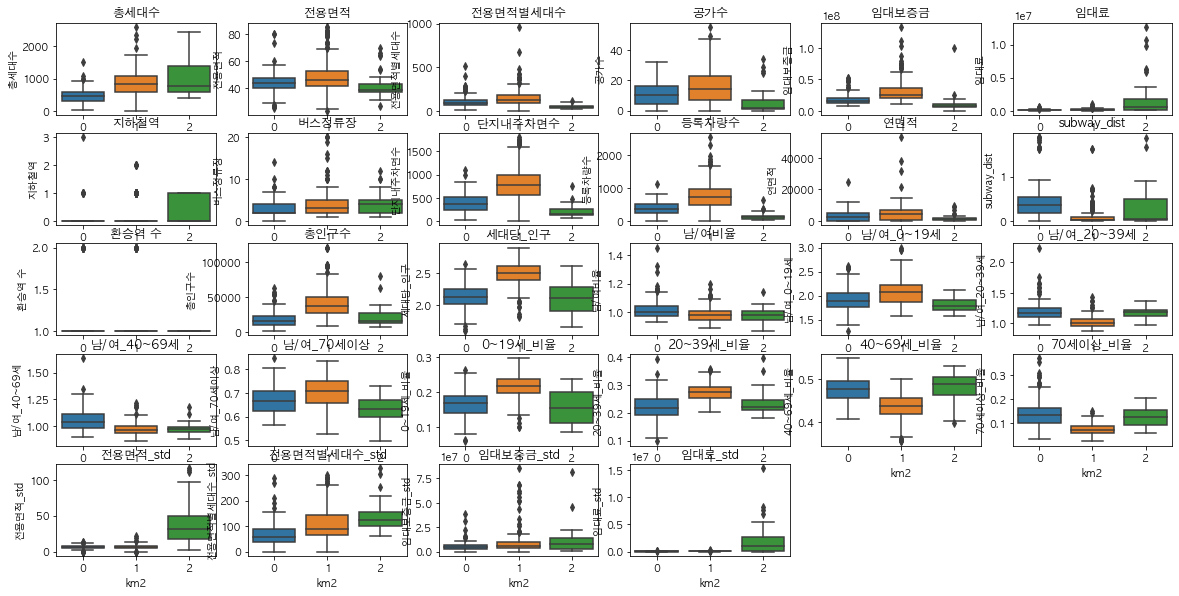

In [320]:
train["km2"] = kmeans.labels_
plt.figure(figsize=(20,24))
for i,r in enumerate(['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '지하철역',
       '버스정류장', '단지내주차면수', '등록차량수', '연면적', 'subway_dist', '환승역 수',
       '총인구수', '세대당_인구', '남/여비율', '남/여_0~19세', '남/여_20~39세', '남/여_40~69세',
       '남/여_70세이상', '0~19세_비율', '20~39세_비율', '40~69세_비율', '70세이상_비율', 
       '전용면적_std', '전용면적별세대수_std', '임대보증금_std', '임대료_std']):
    plt.subplot(12,6,i+1)
    sns.boxplot(train.km2, train[r])
    plt.title(r)

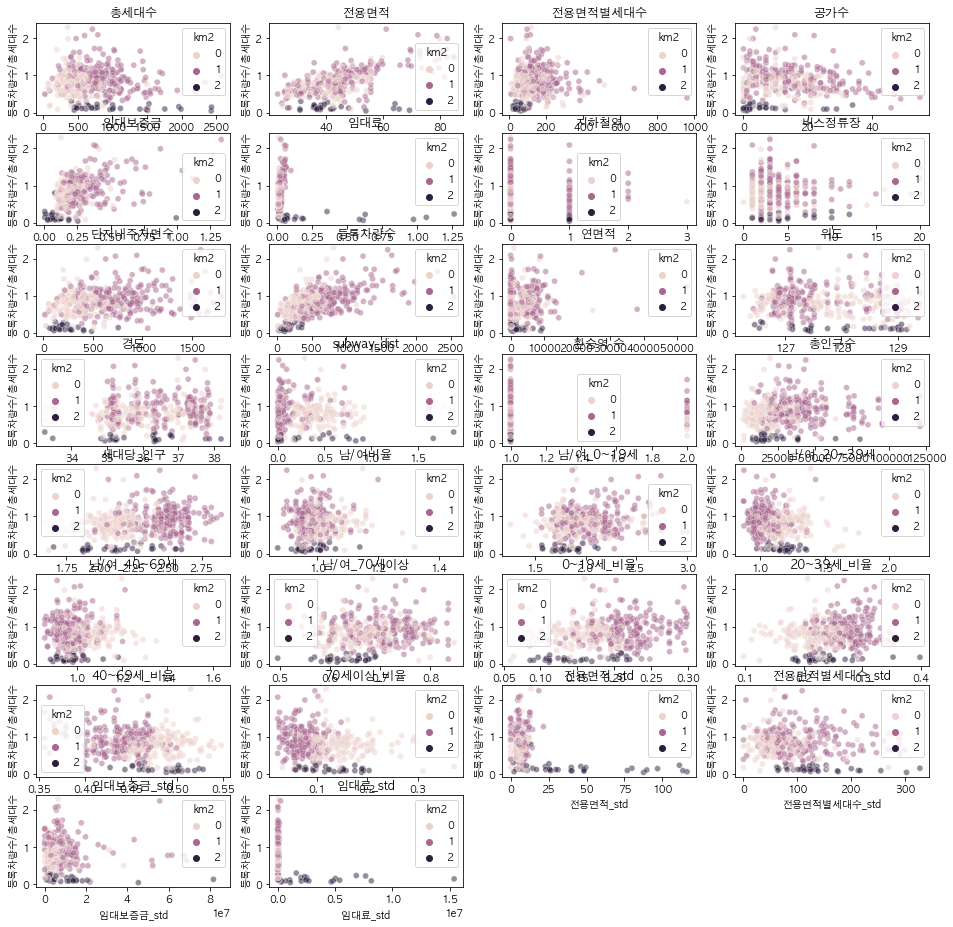

In [321]:
#train["km2"] = kmeans.labels_
plt.figure(figsize=(16,24))
for i,r in enumerate(['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '지하철역',
       '버스정류장', '단지내주차면수', '등록차량수', '연면적', '위도', '경도', 'subway_dist', '환승역 수',
       '총인구수', '세대당_인구', '남/여비율', '남/여_0~19세', '남/여_20~39세', '남/여_40~69세',
       '남/여_70세이상', '0~19세_비율', '20~39세_비율', '40~69세_비율', '70세이상_비율', 
       '전용면적_std', '전용면적별세대수_std', '임대보증금_std', '임대료_std']):
    plt.subplot(12,4,i+1)
    sns.scatterplot(x = r,y = "등록차량수/총세대수", hue = "km2",data = train,alpha = 0.5)
    plt.title(r)

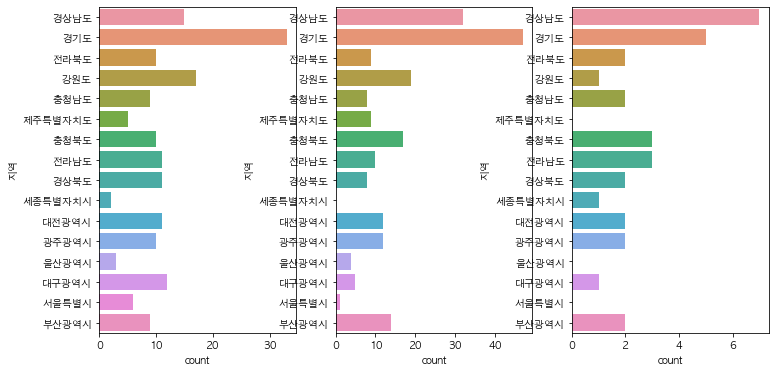

In [322]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.countplot(y = train.loc[kmeans.labels_== 0,"지역"],order = 지역order)
plt.subplot(1,3,2)
sns.countplot(y = train.loc[kmeans.labels_== 1,"지역"],order = 지역order)
plt.subplot(1,3,3)
sns.countplot(y = train.loc[kmeans.labels_== 2,"지역"],order = 지역order)
plt.show()

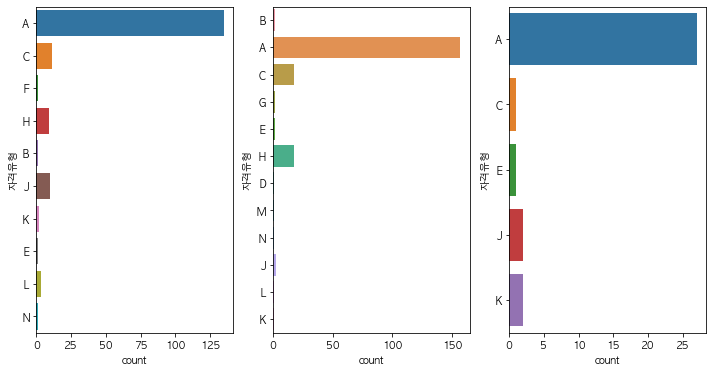

In [323]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.countplot(y = train.loc[kmeans.labels_== 0,"자격유형"])
plt.subplot(1,3,2)
sns.countplot(y = train.loc[kmeans.labels_== 1,"자격유형"])
plt.subplot(1,3,3)
sns.countplot(y = train.loc[kmeans.labels_== 2,"자격유형"])
plt.show()

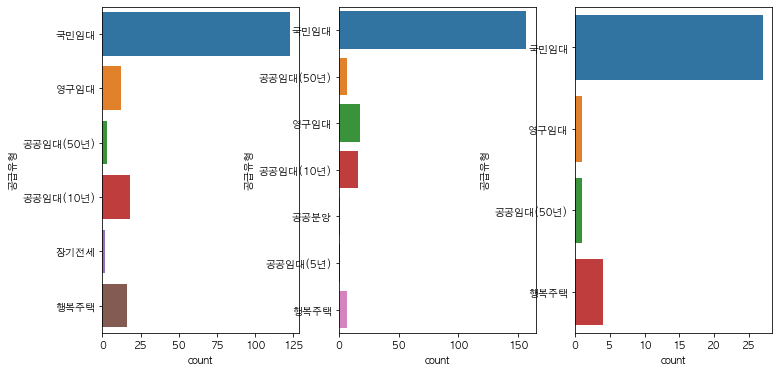

In [324]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.countplot(y = train.loc[kmeans.labels_== 0,"공급유형"])
plt.subplot(1,3,2)
sns.countplot(y = train.loc[kmeans.labels_== 1,"공급유형"])
plt.subplot(1,3,3)
sns.countplot(y = train.loc[kmeans.labels_== 2,"공급유형"])
plt.show()

In [325]:
import pandas as pd
import numpy as np

from shapely.geometry import Point, shape, mapping
from shapely.ops import unary_union

import matplotlib.pyplot as plt

#from geoband.API import *
import folium
import json
import geopandas as gpd
from geopandas import gpd

from folium import plugins
import re

In [326]:
# tmp = train[train['지역']=='서울특별시']
tmp = train
tmp['geometry'] = tmp.apply(lambda row : Point([row['위도'], row['경도']]), axis=1)
apt = gpd.GeoDataFrame(tmp,geometry='geometry')
apt.crs={'init':'epsg:4326'}
#apt = apt[['단지코드','위도','경도','geometry','지역','등록차량수','등록차량수/총세대수','등록차량수/단지내주차면수']].drop_duplicates().reset_index(drop=True)

In [327]:
# tmp = train[train['지역']=='서울특별시']
tmp2 = test
tmp2['geometry'] = tmp2.apply(lambda row : Point([row['위도'], row['경도']]), axis=1)
apt2 = gpd.GeoDataFrame(tmp2,geometry='geometry')
apt2.crs={'init':'epsg:4326'}
#apt = apt[['단지코드','위도','경도','geometry','지역','등록차량수','등록차량수/총세대수','등록차량수/단지내주차면수']].drop_duplicates().reset_index(drop=True)

In [328]:
#gdf = censor_gpd.to_crs(epsg='4326')
converted_json = apt.to_json()
converted_json2 = apt2.to_json()

m = folium.Map(
    location=[37.54238169591348,126.99068745821812],
 attr = '서울',
    zoom_start=12
)

# color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(apt))]
# for n in range(len(apt1)):
#   folium.CircleMarker([apt1['경도'][n],apt1['위도'][n]],
#                       radius=10,
#                       color=color[n],
#                       filcolor=color[n],
#                       fill=True).add_to(m)

for i in range(len(apt)):
    folium.Circle(
    location = [apt.경도[i],apt.위도[i]],
    radius =1000,
    color = "black").add_to(m)

for i in range(len(apt2)):
    folium.Circle(
    location = [apt2.경도[i],apt2.위도[i]],
    radius =1000,
    color = "red").add_to(m)
# choropleth = folium.Choropleth(
#     geo_data=converted_json,
#     data=apt,
#     columns=['단지코드', '등록차량수'],
#     key_on='feature.properties.name',
#     fill_color='YlGnBu', 
#     fill_opacity=1, 
#     line_opacity=1,
#     highlight=True).add_to(m)

folium.plugins.Fullscreen(position='topright',  
                   title='FULL SCREEN ON', 
                   title_cancel='FULL SCREEN OFF',
                   force_separate_button=True
                  ).add_to(m)

#folium.GeoJson(
 #   converted_json
#).add_to(m)
m

In [329]:
#gdf = censor_gpd.to_crs(epsg='4326')
converted_json = apt.to_json()
#converted_json2 = apt2.to_json()

m = folium.Map(
    location=[37.54238169591348,126.99068745821812],
 attr = '서울',
    zoom_start=12
)

tmp1 = apt[apt.km1 == 0].reset_index(drop=True)
tmp2 = apt[apt.km1 == 1].reset_index(drop=True)
for i in range(len(tmp1)):
    folium.Circle(
    location = [tmp1.경도[i],tmp1.위도[i]],
    radius = 1000,
    color = "red").add_to(m)

for i in  range(len(tmp2)):
    folium.Circle(
    location = [tmp2.경도[i],tmp2.위도[i]],
    radius = 1000,
    color = "blue").add_to(m)

for i in range(len(apt2)):
    folium.Circle(
    location = [apt2.경도[i],apt2.위도[i]],
    radius =1000,
    color = "black").add_to(m)
    
folium.plugins.Fullscreen(position='topright',  
                   title='FULL SCREEN ON', 
                   title_cancel='FULL SCREEN OFF',
                   force_separate_button=True
                  ).add_to(m)

#folium.GeoJson(
 #   converted_json
#).add_to(m)
m

In [330]:
#gdf = censor_gpd.to_crs(epsg='4326')
converted_json = apt.to_json()
#converted_json2 = apt2.to_json()

m = folium.Map(
    location=[37.54238169591348,126.99068745821812],
 attr = '서울',
    zoom_start=12
)

tmp1 = apt[apt.km2 == 0].reset_index(drop=True)
tmp2 = apt[apt.km2 == 1].reset_index(drop=True)
tmp3 = apt[apt.km2 == 2].reset_index(drop=True)

for i in range(len(tmp1)):
    folium.Circle(
    location = [tmp1.경도[i],tmp1.위도[i]],
    radius = 1000,
    color = "red").add_to(m)

for i in  range(len(tmp2)):
    folium.Circle(
    location = [tmp2.경도[i],tmp2.위도[i]],
    radius = 1000,
    color = "blue").add_to(m)
for i in  range(len(tmp3)):
    folium.Circle(
    location = [tmp3.경도[i],tmp3.위도[i]],
    radius = 1000,
    color = "green").add_to(m)
for i in range(len(apt2)):
    folium.Circle(
    location = [apt2.경도[i],apt2.위도[i]],
    radius =1000,
    color = "black").add_to(m)
    

folium.plugins.Fullscreen(position='topright',  
                   title='FULL SCREEN ON', 
                   title_cancel='FULL SCREEN OFF',
                   force_separate_button=True
                  ).add_to(m)

#folium.GeoJson(
 #   converted_json
#).add_to(m)
m

In [331]:
apt

단지코드       총세대수    전용면적  전용면적별세대수     공가수           임대보증금          임대료  \
0    C1000   566.0000 45.2186   80.8571 10.0000 13,203,571.4286 121,064.2857   
1    C1004   521.0000 39.1368   27.4211  3.0000  9,645,112.2951 723,662.5175   
2    C1005 1,144.0000 54.3600  381.3333 16.0000 17,107,666.6667 222,046.6667   
3    C1013 1,308.0000 46.1420  261.6000 16.0000 24,924,800.0000 134,726.0000   
4    C1014   996.0000 49.2329  142.2857  5.0000 23,894,000.0000 160,488.5714   
..     ...        ...     ...       ...     ...             ...          ...   
409  C2663   772.0000 41.0050  128.6667 14.0000 30,258,666.6667 269,070.0000   
410  C2666 1,084.0000 43.2583  180.6667 23.0000 18,890,500.0000 133,145.0000   
411  C2670   648.0000 40.9180  129.6000  9.0000 16,350,000.0000 115,188.0000   
412  C2680   758.0000 43.3500  252.6667 19.0000 23,606,333.3333 129,816.6667   
413  C2692   499.0000 43.5700   99.8000 19.0000 15,793,600.0000 117,848.0000   

      지하철역  버스정류장    단지내주차면수      등록차량수        연면적       위도      경도  \
0   0.0000 1.0000   438.0000   481.0000 5,997.7100 127.6466 37.1098   
1   0.0000 2.0000   153.0000    93.0000   948.7600 127.1337 36.8240   
2   0.0000 8.0000   950.0000   376.0000     5.6880 127.1193 36.8210   
3   0.0000 6.0000 1,119.0000 1,665.0000 7,272.9040 126.8715 35.1702   
4   0.0000 2.0000   823.0000   708.0000 6,141.5100 127.3694 35.4002   
..     ...    ...        ...        ...        ...      ...     ...   
409 0.0000 3.0000   700.0000   652.0000    16.6100 127.1253 37.6533   
410 0.0000 1.0000   837.0000   701.0000 5,639.4250 129.1682 35.2416   
411 0.0000 2.0000   600.0000   435.0000 3,766.9554 126.9364 35.9568   
412 0.0000 7.0000   564.0000   590.0000     9.0000 128.1097 35.1569   
413 0.0000 2.0000   409.0000   437.0000 5,967.3000 129.3308 35.7146   

     subway_dist  환승역 수        총인구수  세대당_인구  남/여비율  남/여_0~19세  ...  행복주택  \
0         0.1739 1.0000  9,912.0000  1.9000 1.0300     1.5114  ...     0   
1         0.0181 1.0000 21,296.0000  1.6550 1.1400     1.7826  ...     0   
2         0.0257 1.0000 40,542.0000  2.8200 1.0100     2.1029  ...     0   
3         0.0187 1.0000 16,229.0000  2.5700 0.9000     1.6395  ...     0   
4         0.5158 1.0000  6,632.0000  2.1200 0.9400     1.6454  ...     0   
..           ...    ...         ...     ...    ...        ...  ...   ...   
409       0.0113 1.0000 76,076.0000  2.4500 0.9500     2.1903  ...     0   
410       0.0171 1.0000  7,958.0000  2.0600 1.0200     1.7991  ...     0   
411       0.3677 2.0000 38,365.0000  2.4500 0.9400     1.8105  ...     0   
412       0.7457 1.0000 27,253.0000  2.0500 1.0200     2.0936  ...     0   
413       0.4117 1.0000 21,926.0000  1.8700 1.1200     2.4404  ...     0   

     공공임대(5년,10년)  A  C  D  E  G  H  I  J  K  L  M  N  등록차량수/총세대수  등록차량수/연면적  \
0               0  1  0  0  0  0  0  0  0  0  0  0  0      0.8498     0.0802   
1               0  0  1  1  0  0  0  0  0  0  0  0  0      0.1785     0.0980   
2               0  1  0  0  0  0  0  0  0  0  0  0  0      0.3287    66.1041   
3               0  1  0  0  0  0  0  0  0  0  0  0  0      1.2729     0.2289   
4               0  1  0  0  0  0  0  0  0  0  0  0  0      0.7108     0.1153   
..            ... .. .. .. .. .. .. .. .. .. .. .. ..         ...        ...   
409             0  0  0  0  0  0  1  0  0  0  0  0  0      0.8446    39.2535   
410             0  1  0  0  0  0  0  0  0  0  0  0  0      0.6467     0.1243   
411             0  1  0  0  0  0  0  0  0  0  0  0  0      0.6713     0.1155   
412             0  1  0  0  0  0  0  0  0  0  0  0  0      0.7784    65.5556   
413             0  1  0  0  0  0  0  0  0  0  0  0  0      0.8758     0.0732   

     임대보증금/임대료  km1  km2                    geometry  
0     109.0625    1    0  POINT (127.64656 37.10985)  
1      13.3282    0    2  POINT (127.13374 36.82400)  
2      77.0454    1    1  POINT (127.11927 36.82096)  
3     185.0036    1    1  POINT (126.87151 35.17016)  
4     148.8829    1    0  POINT (127.36936 

In [332]:
#gdf = censor_gpd.to_crs(epsg='4326')
converted_json = apt.to_json()
converted_json2 = apt2.to_json()

m = folium.Map(
    location=[37.54238169591348,126.99068745821812],
 attr = '서울',
    zoom_start=12
)

# color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(apt))]
# for n in range(len(apt1)):
#   folium.CircleMarker([apt1['경도'][n],apt1['위도'][n]],
#                       radius=10,
#                       color=color[n],
#                       filcolor=color[n],
#                       fill=True).add_to(m)

for i in range(len(apt)):
    folium.Circle(
    location = [apt.경도[i],apt.위도[i]],
    radius =1000,
    color = "black").add_to(m)

for i in range(len(apt2)):
    folium.Circle(
    location = [apt2.경도[i],apt2.위도[i]],
    radius =1000,
    color = "red").add_to(m)
# choropleth = folium.Choropleth(
#     geo_data=converted_json,
#     data=apt,
#     columns=['단지코드', '등록차량수'],
#     key_on='feature.properties.name',
#     fill_color='YlGnBu', 
#     fill_opacity=1, 
#     line_opacity=1,
#     highlight=True).add_to(m)

folium.plugins.Fullscreen(position='topright',  
                   title='FULL SCREEN ON', 
                   title_cancel='FULL SCREEN OFF',
                   force_separate_button=True
                  ).add_to(m)

#folium.GeoJson(
 #   converted_json
#).add_to(m)
m

In [333]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(x)
kmeans.predict(x_tst)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [334]:
kmeans.labels_

array([1, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 3, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 3, 0, 0, 1, 0, 0, 1, 3, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 0, 0, 0, 1, 3, 0, 0, 1, 1, 1, 0, 2,
       1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0, 3, 0, 0, 3,
       0, 1, 0, 3, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 0, 2, 1, 3, 0,
       2, 0, 1, 0, 0, 1, 1, 1, 0, 1, 3, 1, 0, 1, 1, 1, 3, 3, 0, 0, 1, 0,
       0, 1, 3, 1, 1, 2, 1, 0, 3, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2,
       0, 2, 3, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 3, 1, 1, 3, 1, 0, 0,
       1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 0, 3, 0,
       3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 3, 1, 1, 1, 1, 3, 1, 1,
       2, 1, 0, 1, 2, 0, 1, 1, 3, 0, 0, 0, 0, 1, 3,

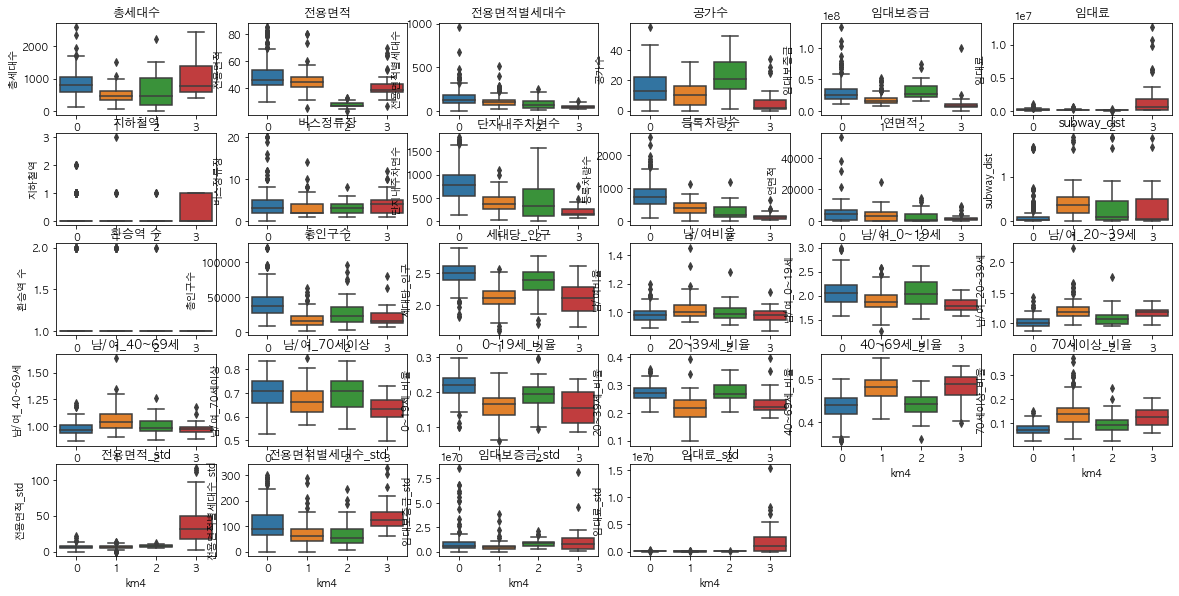

In [335]:
train["km4"] = kmeans.labels_
plt.figure(figsize=(20,24))
for i,r in enumerate(['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '지하철역',
       '버스정류장', '단지내주차면수', '등록차량수', '연면적', 'subway_dist', '환승역 수',
       '총인구수', '세대당_인구', '남/여비율', '남/여_0~19세', '남/여_20~39세', '남/여_40~69세',
       '남/여_70세이상', '0~19세_비율', '20~39세_비율', '40~69세_비율', '70세이상_비율', 
       '전용면적_std', '전용면적별세대수_std', '임대보증금_std', '임대료_std']):
    plt.subplot(12,6,i+1)
    sns.boxplot(train.km4, train[r])
    plt.title(r)

In [336]:
#gdf = censor_gpd.to_crs(epsg='4326')
converted_json = apt.to_json()
#converted_json2 = apt2.to_json()

m = folium.Map(
    location=[37.54238169591348,126.99068745821812],
 attr = '서울',
    zoom_start=12
)

tmp1 = apt[apt.km2 == 0].reset_index(drop=True)
tmp2 = apt[apt.km2 == 1].reset_index(drop=True)
tmp3 = apt[apt.km2 == 2].reset_index(drop=True)
tmp4 = apt[apt.km2 == 3].reset_index(drop=True)

for i in range(len(tmp1)):
    folium.Circle(
    location = [tmp1.경도[i],tmp1.위도[i]],
    radius = 1000,
    color = "red").add_to(m)

for i in  range(len(tmp2)):
    folium.Circle(
    location = [tmp2.경도[i],tmp2.위도[i]],
    radius = 1000,
    color = "blue").add_to(m)
for i in  range(len(tmp3)):
    folium.Circle(
    location = [tmp3.경도[i],tmp3.위도[i]],
    radius = 1000,
    color = "green").add_to(m)
for i in  range(len(tmp4)):
    folium.Circle(
    location = [tmp4.경도[i],tmp3.위도[i]],
    radius = 1000,
    color = "orange").add_to(m)
for i in range(len(apt2)):
    folium.Circle(
    location = [apt2.경도[i],apt2.위도[i]],
    radius =1000,
    color = "black").add_to(m)
    

folium.plugins.Fullscreen(position='topright',  
                   title='FULL SCREEN ON', 
                   title_cancel='FULL SCREEN OFF',
                   force_separate_button=True
                  ).add_to(m)

#folium.GeoJson(
 #   converted_json
#).add_to(m)
m